# KNN Algorithm

## Importing Required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


## Load Dataset

In [5]:
# Reading the csv input dataset
ds = pd.read_csv('car_evaluation_problem.csv',encoding = 'utf-8',header = None)

In [19]:
# View first 5 records
ds.head(10)

,buying,maint,doors,persons,lug_boot,safety,classes
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
5,1,1,1,1,2,3,1
6,1,1,1,1,3,1,1
7,1,1,1,1,3,2,1
8,1,1,1,1,3,3,1
9,1,1,1,2,1,1,1


## Since the column names are not readable, we are renaming

In [7]:
ds.rename(columns = {0:'buying',1:'maint',2:'doors',3:'persons',4:'lug_boot',5:'safety',6:'classes'},inplace = True)

ds.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Checking whether null values are present

In [8]:
ds.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

## Checking unique values of each column, to check whether we can give ordinal values

In [10]:
ds.buying.unique()



array(['2', '3', '4', '5more'], dtype=object)

In [11]:
ds.maint.unique()



array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [12]:
ds.doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [13]:
ds.persons.unique()

array(['2', '4', 'more'], dtype=object)

In [14]:
ds.lug_boot.unique()

array(['small', 'med', 'big'], dtype=object)

In [15]:
ds.safety.unique()

array(['low', 'med', 'high'], dtype=object)

In [16]:
ds.classes.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

## From the above we can see all the columns are non-numeric & categorical
Hence Encode Data

In [17]:
ds.buying.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
ds.maint.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
ds.doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
ds.persons.replace(('2','4','more'),(1,2,3), inplace=True)
ds.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
ds.safety.replace(('low','med','high'),(1,2,3), inplace=True)
ds.classes.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

## checking shape of dataset

In [18]:
ds.shape

(1728, 7)

In [20]:
ds.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


## Viewing histogram

array([[<AxesSubplot:title={'center':'buying'}>,
        <AxesSubplot:title={'center':'maint'}>,
        <AxesSubplot:title={'center':'doors'}>],
       [<AxesSubplot:title={'center':'persons'}>,
        <AxesSubplot:title={'center':'lug_boot'}>,
        <AxesSubplot:title={'center':'safety'}>],
       [<AxesSubplot:title={'center':'classes'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

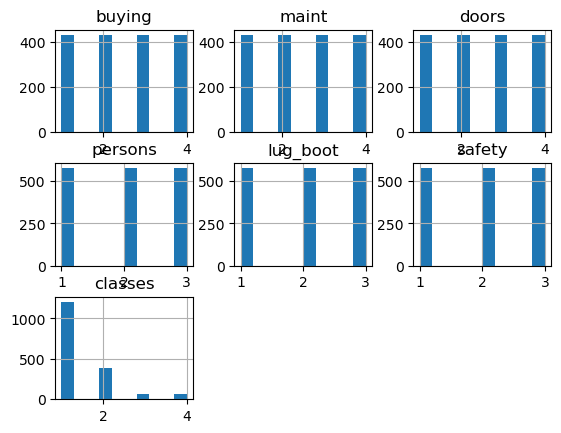

In [21]:
ds.hist()

## Assigning X & Y variables for the model

In [22]:
X=ds[ds.columns[:-1]]
Y=ds['classes']

In [23]:
X.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2


## Splitting train-test in the ratio 70:30

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

## Applying KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)

## Fitting into the model

In [26]:
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)
knn.score(xtest,ytest)

0.9210019267822736

## Verifying the accuracy 

In [27]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97       358
           2       0.87      0.83      0.85       118
           3       0.67      0.53      0.59        19
           4       0.87      0.54      0.67        24

    accuracy                           0.92       519
   macro avg       0.84      0.72      0.77       519
weighted avg       0.92      0.92      0.92       519



## Applying Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

## Fitting into the model & check accuracy

In [29]:
rfc.fit(xtrain,ytrain)
rf_pred = rfc.predict(xtest)
print(rfc.score(xtest,ytest))
print(f1_score(ytest,rfc.predict(xtest),average='macro'))

0.9595375722543352
0.9013772737189931


In [30]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       358
           2       0.93      0.90      0.91       118
           3       0.77      0.89      0.83        19
           4       0.88      0.88      0.88        24

    accuracy                           0.96       519
   macro avg       0.89      0.91      0.90       519
weighted avg       0.96      0.96      0.96       519



# RFC is providing more Accuracy - 96%
# Knn - 92%